In [5]:
!pip install kaggle

In [4]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [6]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 161M/163M [00:08<00:00, 24.4MB/s]
100% 163M/163M [00:08<00:00, 19.4MB/s]


In [7]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [10]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1213.jpg', 'with_mask_1856.jpg', 'with_mask_2217.jpg', 'with_mask_511.jpg', 'with_mask_1814.jpg']
['with_mask_2176.jpg', 'with_mask_524.jpg', 'with_mask_109.jpg', 'with_mask_2484.jpg', 'with_mask_3220.jpg']


In [11]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1453.jpg', 'without_mask_2425.jpg', 'without_mask_888.jpg', 'without_mask_2632.jpg', 'without_mask_3739.jpg']
['without_mask_670.jpg', 'without_mask_719.jpg', 'without_mask_2196.jpg', 'without_mask_302.jpg', 'without_mask_2211.jpg']


In [12]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [13]:

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [14]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [15]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [16]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

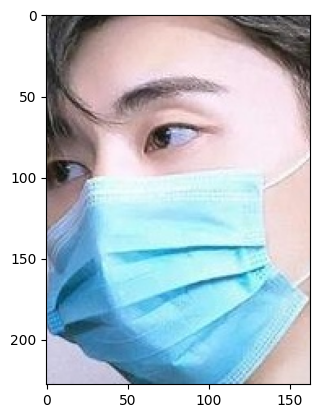

In [17]:
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

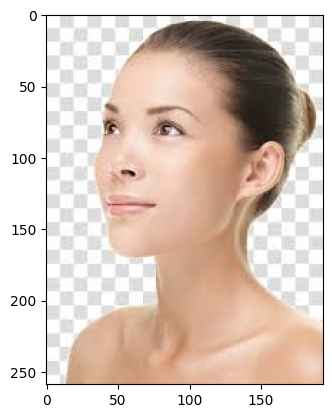

In [18]:
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [19]:

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
type(data)

list

In [21]:
len(data)

7553

In [22]:
data[0]

array([[[195, 156, 127],
        [195, 153, 126],
        [193, 148, 123],
        ...,
        [228, 184, 196],
        [225, 181, 193],
        [223, 178, 191]],

       [[194, 153, 125],
        [194, 151, 124],
        [192, 147, 122],
        ...,
        [228, 185, 196],
        [225, 182, 193],
        [223, 181, 192]],

       [[191, 148, 121],
        [191, 147, 121],
        [191, 144, 119],
        ...,
        [229, 189, 198],
        [226, 187, 196],
        [224, 186, 195]],

       ...,

       [[227, 199, 174],
        [227, 199, 174],
        [227, 199, 172],
        ...,
        [247, 211, 181],
        [249, 216, 186],
        [250, 218, 189]],

       [[217, 185, 159],
        [217, 186, 159],
        [219, 188, 160],
        ...,
        [250, 216, 186],
        [252, 219, 190],
        [252, 220, 193]],

       [[212, 177, 151],
        [212, 179, 151],
        [214, 182, 154],
        ...,
        [251, 219, 189],
        [253, 220, 192],
        [253, 221, 194]]

In [23]:
type(data[0])

numpy.ndarray

In [24]:
data[0].shape

(128, 128, 3)

In [25]:

X = np.array(data)
Y = np.array(labels)

In [26]:
type(X)

numpy.ndarray

In [27]:
type(Y)

numpy.ndarray

In [28]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [29]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [32]:

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [33]:
X_train[0]

array([[[252, 252, 254],
        [252, 252, 254],
        [252, 252, 254],
        ...,
        [251, 251, 253],
        [251, 251, 253],
        [251, 251, 253]],

       [[252, 252, 254],
        [252, 252, 254],
        [252, 252, 254],
        ...,
        [251, 251, 253],
        [251, 251, 253],
        [251, 251, 253]],

       [[252, 252, 254],
        [252, 252, 254],
        [252, 252, 254],
        ...,
        [251, 251, 253],
        [251, 251, 253],
        [251, 251, 253]],

       ...,

       [[226, 220, 234],
        [223, 216, 230],
        [230, 221, 234],
        ...,
        [161, 111,  92],
        [168, 119, 100],
        [174, 124, 107]],

       [[225, 220, 234],
        [228, 222, 235],
        [231, 224, 237],
        ...,
        [168, 117,  99],
        [175, 125, 108],
        [181, 131, 114]],

       [[226, 219, 232],
        [227, 223, 234],
        [229, 226, 237],
        ...,
        [169, 122, 104],
        [177, 130, 112],
        [184, 137, 119]]

In [34]:
X_train_scaled[0]

array([[[0.98823529, 0.98823529, 0.99607843],
        [0.98823529, 0.98823529, 0.99607843],
        [0.98823529, 0.98823529, 0.99607843],
        ...,
        [0.98431373, 0.98431373, 0.99215686],
        [0.98431373, 0.98431373, 0.99215686],
        [0.98431373, 0.98431373, 0.99215686]],

       [[0.98823529, 0.98823529, 0.99607843],
        [0.98823529, 0.98823529, 0.99607843],
        [0.98823529, 0.98823529, 0.99607843],
        ...,
        [0.98431373, 0.98431373, 0.99215686],
        [0.98431373, 0.98431373, 0.99215686],
        [0.98431373, 0.98431373, 0.99215686]],

       [[0.98823529, 0.98823529, 0.99607843],
        [0.98823529, 0.98823529, 0.99607843],
        [0.98823529, 0.98823529, 0.99607843],
        ...,
        [0.98431373, 0.98431373, 0.99215686],
        [0.98431373, 0.98431373, 0.99215686],
        [0.98431373, 0.98431373, 0.99215686]],

       ...,

       [[0.88627451, 0.8627451 , 0.91764706],
        [0.8745098 , 0.84705882, 0.90196078],
        [0.90196078, 0

**Building a Convolutional Neural Networks (CNN)**

In [35]:
import tensorflow as tf
from tensorflow import keras

In [36]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [38]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 16s 24ms/step - loss: 0.5343 - acc: 0.7947 - val_loss: 0.2783 - val_acc: 0.8711
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.3076 - acc: 0.8775 - val_loss: 0.2516 - val_acc: 0.8893
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2552 - acc: 0.9031 - val_loss: 0.2198 - val_acc: 0.9091
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2037 - acc: 0.9200 - val_loss: 0.2389 - val_acc: 0.9124
Epoch 5/5
170/170 [==============================] - 3s 19ms/step - loss: 0.1929 - acc: 0.9235 - val_loss: 0.2010 - val_acc: 0.9140


**Model Evaluation**

In [39]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.1943 - acc: 0.9232
Test Accuracy = 0.9232296347618103


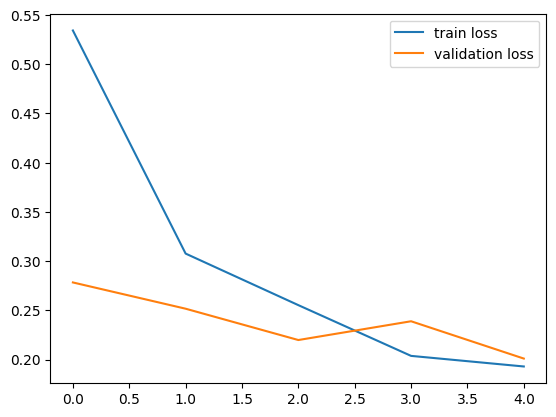

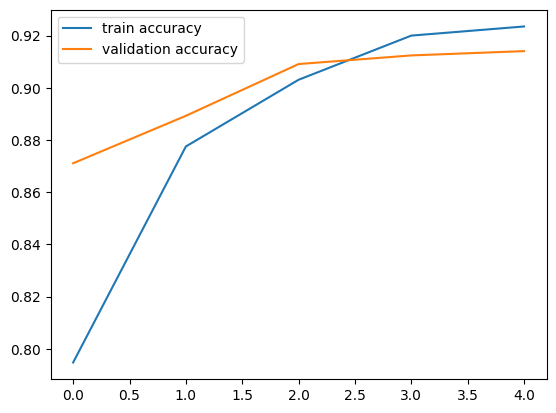

In [45]:
h = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/with mask.jpg


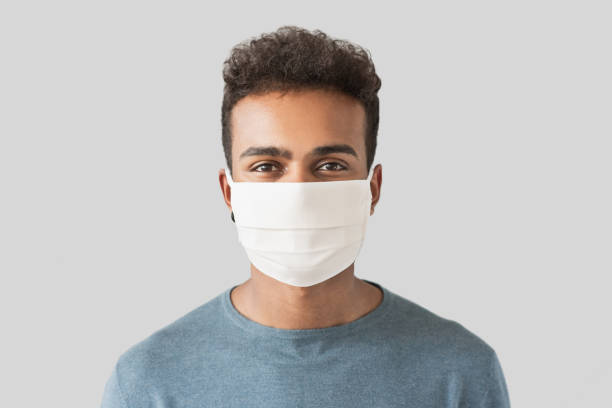

1/1 [==============================] - 0s 18ms/step
[[0.24416475 0.44072506]]
1
The person in the image is wearing a mask


In [48]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [51]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')